In [16]:
from tensorflow import keras
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
# https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification/
df = pd.read_csv("./cnn_data/Training_set.csv")

df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [18]:
vc = df['label'].value_counts()
print(vc)

label_unique = np.unique(df['label'].values)

int_to_label = dict(enumerate(label_unique))
label_to_int = {el: ind for ind, el in int_to_label.items()}
df['label_int'] = df['label'].map(lambda x: label_to_int[x])

MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
CRECENT            97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: label, Length: 75, dtype: int64


In [19]:
images = []

for i in range(df['label'].size):
    try:
        image = imread(f"./cnn_data/train/Image_{i + 1}.jpg")
        new_item = np.array(image, dtype=np.float64) / 255

        images.append(new_item)
    except:
        print(i)

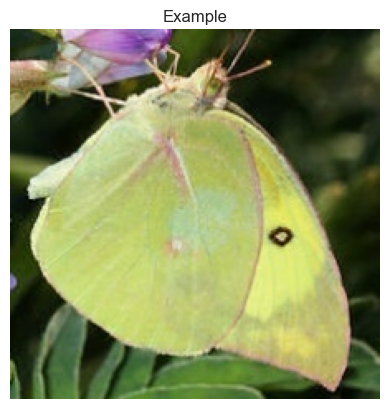

In [20]:
plt.axis("off")
plt.title("Example")
plt.imshow(images[0])

plt.show()

In [21]:
images[0].shape

(224, 224, 3)

In [22]:
input_shape = images[0].shape

In [23]:
x_train, x_test, y_train, y_test = train_test_split(images, keras.utils.to_categorical(df['label_int']), test_size=0.2)

In [24]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [25]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(len(vc), activation="softmax"),
    ]
)

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=2)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dropout_1 (Dropout)         (None, 186624)           

In [26]:
epochs = 10

learn_process = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1, callbacks=[callback])

Epoch 1/10
147/147 [==============================] - 133s 878ms/step - loss: 3.6822 - accuracy: 0.1891 - val_loss: 2.4389 - val_accuracy: 0.3923
Epoch 2/10
147/147 [==============================] - 107s 728ms/step - loss: 1.0108 - accuracy: 0.7485 - val_loss: 2.3286 - val_accuracy: 0.4519
Epoch 3/10
147/147 [==============================] - 120s 820ms/step - loss: 0.1387 - accuracy: 0.9692 - val_loss: 2.7385 - val_accuracy: 0.4538
Epoch 4/10
147/147 [==============================] - 108s 736ms/step - loss: 0.0313 - accuracy: 0.9944 - val_loss: 2.9112 - val_accuracy: 0.4385
Epoch 5/10
147/147 [==============================] - 98s 661ms/step - loss: 0.0130 - accuracy: 0.9979 - val_loss: 3.1357 - val_accuracy: 0.4269
Epoch 6/10
147/147 [==============================] - 97s 660ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 3.0213 - val_accuracy: 0.4481
Epoch 7/10
147/147 [==============================] - 103s 701ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 3.0417 - v

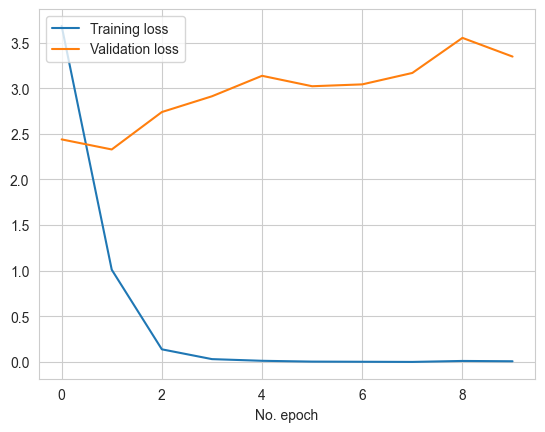

In [30]:
plt.plot(learn_process.history['loss'], label='Training loss')
plt.plot(learn_process.history['val_loss'], label='Validation loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

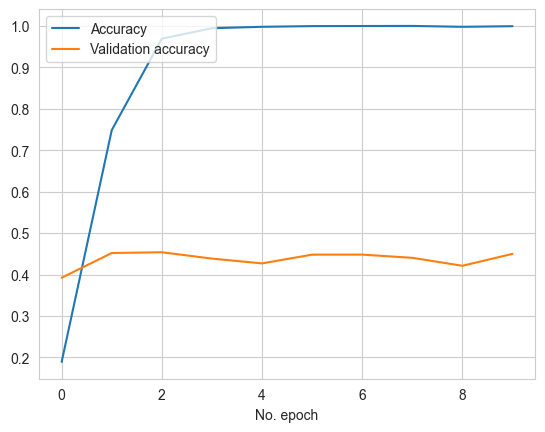

In [31]:
plt.plot(learn_process.history['accuracy'], label='Accuracy')
plt.plot(learn_process.history['val_accuracy'], label='Validation accuracy')

plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 3.4143106937408447
Test accuracy: 0.4384615421295166
